# LaPrice

---

## i. Perkenalan

=================================================

Laptop Price Prediction Project

Nama  : Sulthan Fachry Inadamar

=================================================

### Latar Belakang:

Laptop adalah salah satu teknologi yang sangat berguna saat ini. Teknologi ini merupakan perangkat elektronik produk teknologi informasi dan komunikasi. Laptop menjadi perangkat kerja utama bagi sebagian orang. Keunggulan dari laptop antara lain adalah karena portabilitasnya, desainnya yang kecil dan simpel sehingga dapat digunakan dimana saja. 

### Masalah:

Saat ini harga produk laptop sangatlah beragam dikarenakan spesifikasi laptop yang selalu berkembang dan beragam seiring jalannya waktu. Hal ini membuat perusahaan kesusahan dalam menentukan harga produk yang ideal. Program yang akan dibuat pada Milestone 2 ini akan memprediksi harga laptop berdasarkan harga market saat ini guna membantu menentukan harga laptop baru yang ingin diterbitkan.

- Dari dataset ini melalui EDA dapat mengetahui trend dan merekomendasikan spesifikasi laptop yang cocok melalui machine learning.
- Project kali ini hanya berfokus pada penentuan harga laptop berdasarkan spesifikasinya dari harga market saat ini.
- Adapaun artikel atau saran dari internet yang dapat membantu menentukan spesifikasi dimaksud dari poin diatas.

Justifikasi :
- https://komunikasipraktis.com/pengertian-laptop-asal-kata-dan-sejarahnya/
- https://www.bhinneka.com/blog/laptop-terbaik/
- https://id.my-best.com/2491
- https://prezi.com/l4v1veelkvuo/factors-that-affect-prices-of-laptops/#:~:text=%2DIt%20is%20predicated%20that%20the,laptop%20thickness%2C%20and%20screen%20size.


---

## ii. Import Libraries

In [622]:
# Dataframe
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr,kendalltau,spearmanr

# Model saving
import json
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Evaluation
from sklearn.metrics import make_scorer, mean_squared_error, recall_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

# Deployment
import streamlit as st

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")

## iii. Data Loading

| Column Name            | Description                                                  |
|-----------------------|--------------------------------------------------------------|
| Company               | The manufacturer of the laptop.                             |
| Product               | The brand and model of the laptop.                          |
| TypeName              | Type of laptop (e.g., Notebook, Ultrabook, Gaming, etc.).  |
| Inches                | Screen size of the laptop in inches.                        |
| Ram                   | Total amount of RAM in the laptop (in GB).                 |
| OS                    | Operating System installed on the laptop.                   |
| Weight                | Weight of the laptop in kilograms.                          |
| Price_euros          | Price of the laptop in Euros (target variable).             |
| Screen                | Screen definition (e.g., Standard, Full HD, 4K Ultra HD).  |
| ScreenW              | Screen width in pixels.                                     |
| ScreenH              | Screen height in pixels.                                    |
| Touchscreen           | Indicates if the laptop has a touchscreen (Yes/No).        |
| IPSpanel              | Indicates if the laptop has an IPS panel (Yes/No).         |
| RetinaDisplay         | Indicates if the laptop has a Retina display (Yes/No).     |
| CPU_company           | Manufacturer of the laptop's CPU.                           |
| CPU_freq              | Frequency of the laptop's CPU (in Hz).                      |
| CPU_model             | Model of the laptop's CPU.                                  |
| PrimaryStorage        | Primary storage space of the laptop (in GB).                |
| PrimaryStorageType    | Type of primary storage (e.g., HDD, SSD, Flash Storage, Hybrid). |
| SecondaryStorage      | Secondary storage space, if any (in GB).                    |
| SecondaryStorageType  | Type of secondary storage (e.g., HDD, SSD, Hybrid, None).   |
| GPU_company           | Manufacturer of the laptop's GPU.                           |
| GPU_model             | Model of the laptop's GPU.                                  |


In [541]:
# Load Data
df = pd.read_csv('laptop_prices.csv')
pd.set_option('display.max_columns',None)

# Display 5 row
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [542]:
data = df.copy()

Meng-duplikat dataframe agar dataframe asli tidak terubah-ubah.

In [543]:
# Menampilkan 5 data dari atas
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [544]:
# Menampilkan 5 data dari bawah
data.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,1080,Yes,Yes,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,1800,Yes,Yes,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,768,No,No,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

- Dataset ini memiliki 23 kolom dan 1275 baris.
- Melalui syntax diatas terlihat tidak ada missing value.
- Datatype numerik 9 kolom sedangkan kategorik 14 kolom.

In [546]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6
PrimaryStorage,1275.0,444.517647,365.537726,8.00,256.0,256.00,512.00,2048.0
SecondaryStorage,1275.0,176.069020,415.960655,0.00,0.0,0.00,0.00,2048.0


Insight:
- Rentang harga (min-max) sangat lebar, dari 174 euro hingga 6099 euro. Ini menunjukkan adanya variasi produk yang sangat besar, dari yang murah hingga sangat mahal.
- Rata-rata harga laptop yang ada pada dataset dikisaran 1134 euro atau sekitar Rp. 19.153.148,03
- Nilai minimum untuk Secondary Storage adalah 0, menunjukkan bahwa banyak perangkat tidak memiliki Secondary Storage.
- Banyak perangkat memiliki ukuran layar 1920x1080 piksel. Ini mungkin menunjukkan bahwa konfigurasi ini adalah yang paling umum di pasar.

In [547]:
data.duplicated().sum()

np.int64(0)

Insight:
- Tidak ada data yang duplikat.

## iv. Exploratory Data Analysis (EDA)

### Numerikal dan Kategorikal

In [548]:
# Defining Numerical and Categorical Columns in data
cat_col = data.select_dtypes(include=['object']).columns.tolist()
num_col = data.select_dtypes(include=np.number).columns.tolist()

print('Numerical Columns', num_col)
print('Categorical Columns', cat_col)

Numerical Columns ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']
Categorical Columns ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


### Distribusi seluruh data numerik

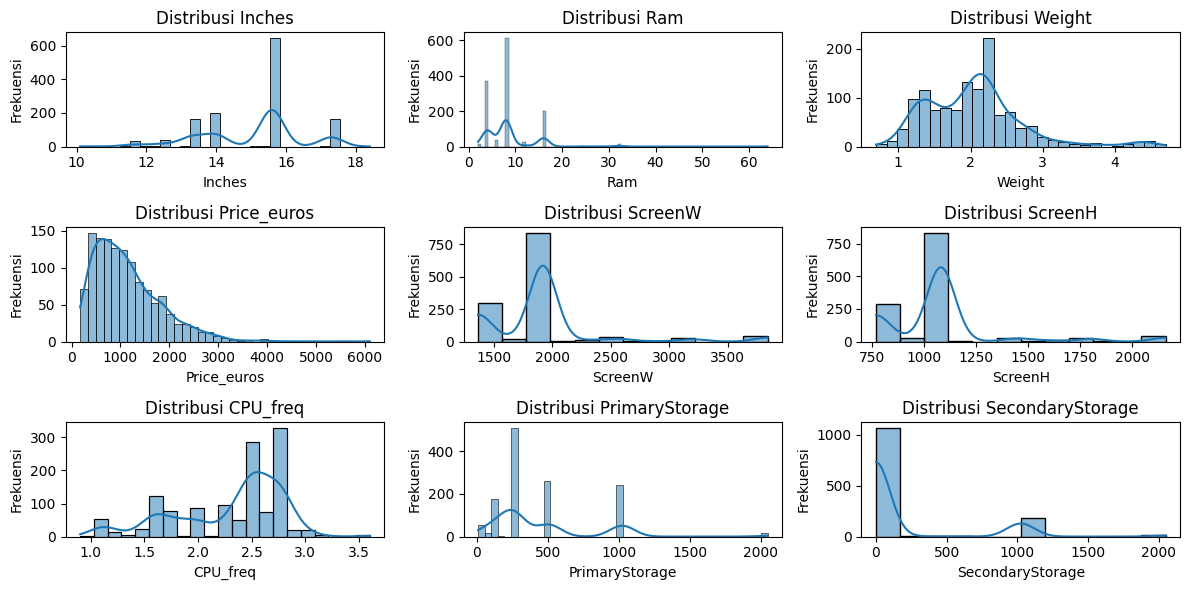

In [549]:
# Visualisasi Distribusi seluruh data numerik dengan cek skewness 
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_col):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}'),
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Insight:
- ScreenW dan ScreenH: Sebagian besar perangkat memiliki resolusi layar 1920x1080 piksel.
- Price euros: Harga perangkat sangat bervariasi, dengan sebagian besar perangkat berada pada kisaran harga tertentu. Ada beberapa perangkat dengan harga yang sangat tinggi, yang mungkin merupakan perangkat premium atau dengan spesifikasi yang sangat tinggi.
- Inches: Ukuran layar perangkat kebanyakan berkisar antara 14-16 inci, dengan sedikit variasi ke ukuran yang lebih besar.
- Weight: Berat perangkat umumnya terdistribusi cukup merata, dengan sedikit kecenderungan ke berat yang lebih ringan.
- Ram: Kebanyakan perangkat memiliki RAM 8GB, namun ada juga yang memiliki RAM yang jauh lebih rendah atau lebih tinggi.

In [550]:
data[num_col].skew()

Inches             -0.438622
Ram                 2.698716
Weight              1.150804
Price_euros         1.511147
ScreenW             2.210137
ScreenH             2.117949
CPU_freq           -0.838246
PrimaryStorage      1.592866
SecondaryStorage    2.257643
dtype: float64

Insight:
- Skewness level tidak terlalu tinggi, bisa dikategorikan moderate.

### Correlation

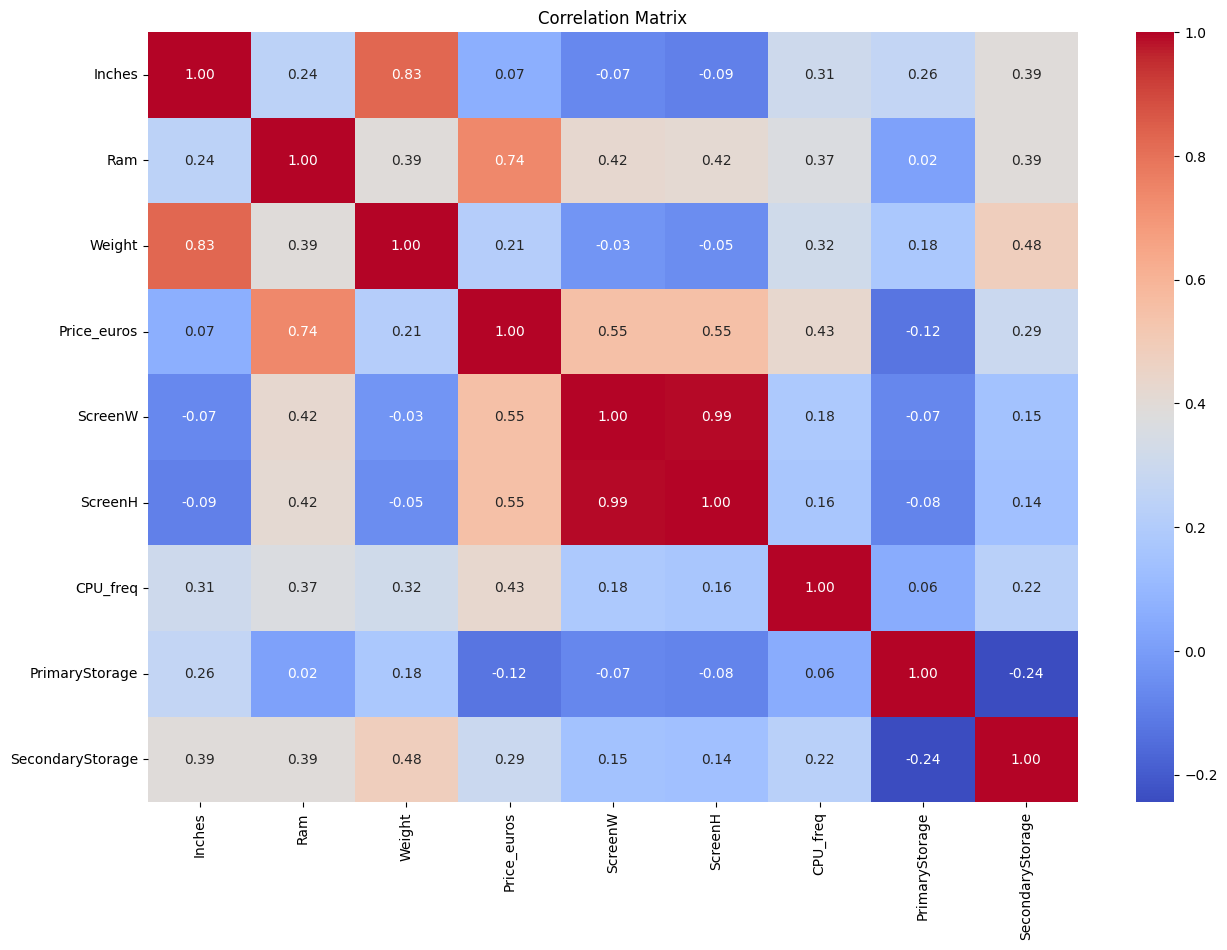

In [551]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[num_col].corr(), annot=True, fmt=".2f", cmap="coolwarm",xticklabels="auto")
plt.title("Correlation Matrix")
plt.show()

Insight:
- Kolom `Price_euros` memiliki korelasi positif yang kuat dengan `RAM`, `ScreenW`, `ScreenH`, dan `CPU_freq`: Ini menunjukkan bahwa semakin tinggi RAM, ukuran layar, dan frekuensi prosesor, maka harga perangkat cenderung semakin mahal. Ini masuk akal karena komponen-komponen tersebut umumnya dianggap sebagai faktor yang mempengaruhi harga perangkat.
- Ukuran layar (ScreenW dan ScreenH) memiliki korelasi yang sangat kuat satu sama lain. Ini menunjukkan bahwa kedua variabel ini sangat terkait erat, yang memang seharusnya demikian karena keduanya menggambarkan dimensi layar.
- Kolom `Weight` memiliki korelasi dengan kolom `Inches`. Hal ini normal karena semakin lebar monitor semakin berat juga laptop.

Kesimpulan:

Variabel yang Mungkin Menjadi Prediktor Harga: Variabel seperti RAM, ScreenW, ScreenH, CPU_freq, dan SecondaryStorage dapat menjadi variabel prediktor yang baik untuk memprediksi harga perangkat.


### Hubungan `Price_euros` dengan `RAM`, `ScreenW`, `ScreenH`, `CPU_freq`

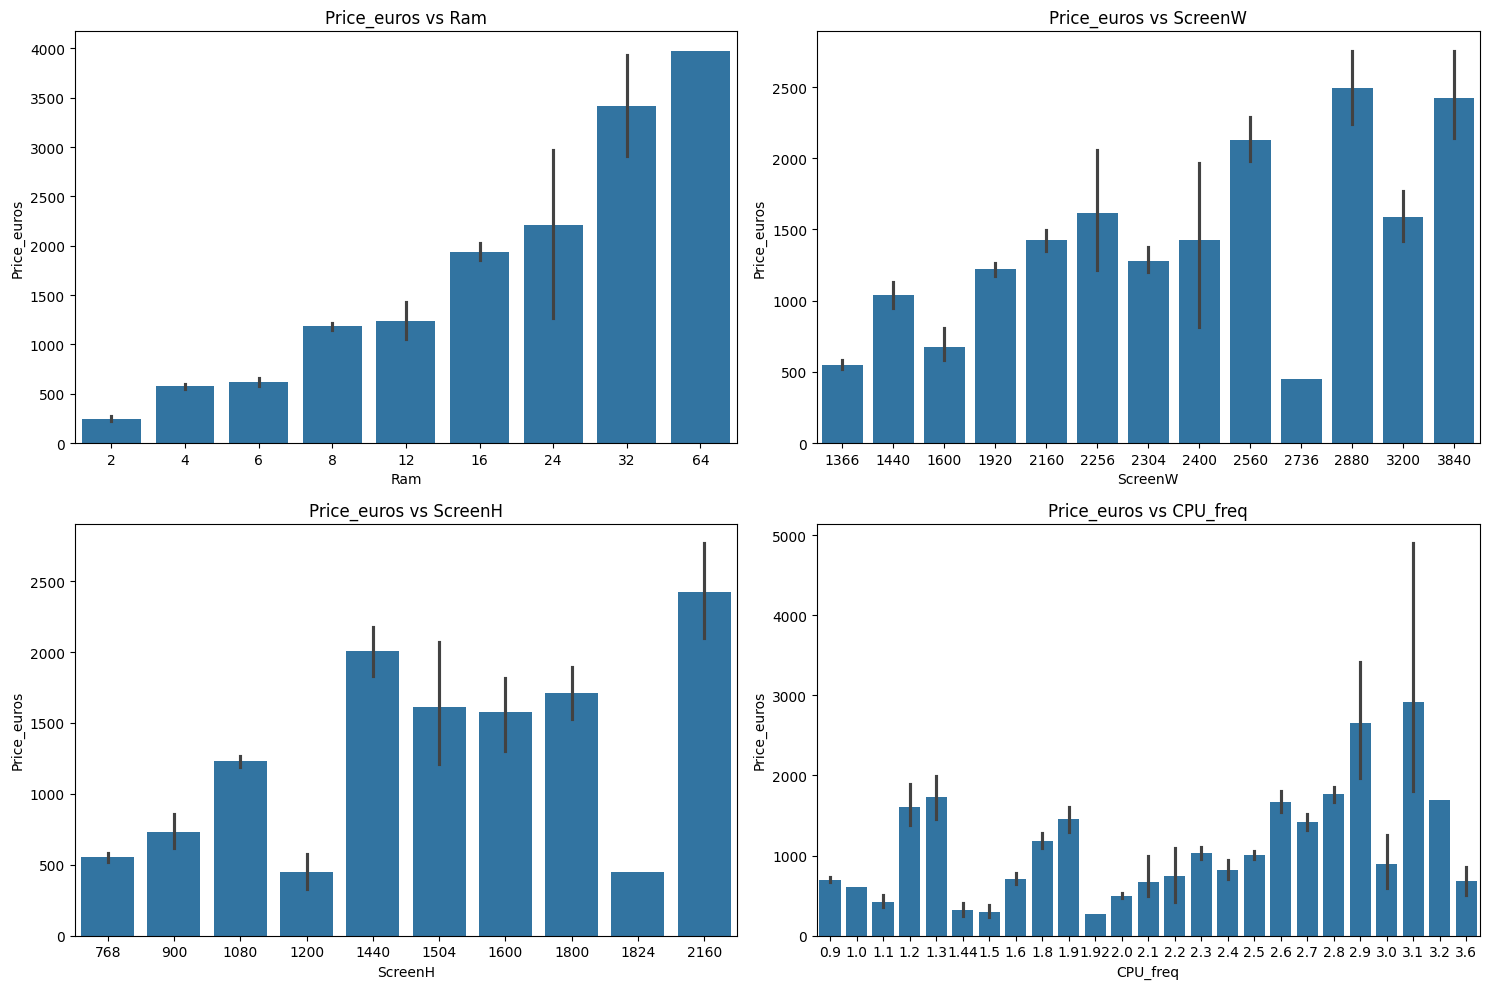

In [552]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(data=data, y='Price_euros', x='Ram', ax=axs[0][0]); axs[0][0].set_title('Price_euros vs Ram')
sns.barplot(data=data, y='Price_euros', x='ScreenW', ax=axs[0][1]); axs[0][1].set_title('Price_euros vs ScreenW')
sns.barplot(data=data, y='Price_euros', x='ScreenH', ax=axs[1][0]); axs[1][0].set_title('Price_euros vs ScreenH')
sns.barplot(data=data, y='Price_euros', x='CPU_freq', ax=axs[1][1]); axs[1][1].set_title('Price_euros vs CPU_freq')

plt.tight_layout()

Insight:
- Dari grafis diatas bisa dikonfirmasikan bahwa adanya linear relationship dari nilai RAM, Screen ratio, dan CPU_Freq. Semakin tinggi value maka harga laptop akan semakin meningkat.

### Check Cardinality

In [553]:
for col in cat_col:
  print(f'cardinality kolom {col}:', data[col].nunique())

cardinality kolom Company: 19
cardinality kolom Product: 618
cardinality kolom TypeName: 6
cardinality kolom OS: 9
cardinality kolom Screen: 4
cardinality kolom Touchscreen: 2
cardinality kolom IPSpanel: 2
cardinality kolom RetinaDisplay: 2
cardinality kolom CPU_company: 3
cardinality kolom CPU_model: 93
cardinality kolom PrimaryStorageType: 4
cardinality kolom SecondaryStorageType: 4
cardinality kolom GPU_company: 4
cardinality kolom GPU_model: 110


Insight:
- Beberapa kolom memiliki kardinalitas yang tinggi, pada kolom Product (618 nilai unik), CPU model (93 nilai unik), dan GPU_model(110 nilai unik). Dari ketiga kolom tersebut mengindikasikan bahwa ada banyak variasi produk dan model CPU yang berbeda dalam dataset. 

In [554]:
# Menghapus kalimat akhir setelah sepasi
data['GPU_model'] = data['GPU_model'].str.rstrip()
data['GPU_model'] = data['GPU_model'].apply(lambda x: re.sub(r'\s\d+', '', x))

In [555]:
# Menghapus kalimat akhir setelah sepasi
data['CPU_model'] = data['CPU_model'].str.rstrip()
data['CPU_model'] = data['CPU_model'].apply(lambda x: re.sub(r'\s\d+', '', x))

In [556]:
for col in cat_col:
  print(f'cardinality kolom {col}:', data[col].nunique())

cardinality kolom Company: 19
cardinality kolom Product: 618
cardinality kolom TypeName: 6
cardinality kolom OS: 9
cardinality kolom Screen: 4
cardinality kolom Touchscreen: 2
cardinality kolom IPSpanel: 2
cardinality kolom RetinaDisplay: 2
cardinality kolom CPU_company: 3
cardinality kolom CPU_model: 58
cardinality kolom PrimaryStorageType: 4
cardinality kolom SecondaryStorageType: 4
cardinality kolom GPU_company: 4
cardinality kolom GPU_model: 62


- Cardinality sudah berkurang

### Missing Values

In [557]:
data.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

- No missing value.

## v. Feature Engineering

### Data Pre-Processing

#### Split Fitur dan Target

In [558]:
#split fitur dan target
X= data.drop('Price_euros', axis=1) #fitur
y= data['Price_euros'] #target

#### Split Train Test

In [559]:
#pisahkan menjadi train dan test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3,
                                                  random_state=43
                                                   )

In [560]:
X_train.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
958,Dell,XPS 13,Ultrabook,13.3,8,Windows 10,1.30,Quad HD+,3200,1800,No,No,No,Intel,2.5,Core i7U,256,0,SSD,No,Intel,HD Graphics
729,HP,15-BW037na (A9-9420/4GB/1TB/Radeon,Notebook,15.6,4,Windows 10,2.10,Full HD,1920,1080,No,No,No,AMD,3.0,A9-Series,1024,0,HDD,No,AMD,Radeon
644,Acer,Extensa EX2540,Notebook,15.6,4,Windows 10,2.40,Standard,1366,768,No,No,No,Intel,2.0,Core i3U,500,0,HDD,No,Intel,HD Graphics
649,Lenovo,Thinkpad X270,Ultrabook,12.5,8,Windows 10,1.36,Full HD,1920,1080,No,Yes,No,Intel,2.7,Core i7U,256,0,SSD,No,Intel,HD Graphics
967,HP,ProBook 450,Notebook,15.6,4,Windows 10,2.04,Full HD,1920,1080,No,No,No,Intel,2.4,Core i3U,500,0,HDD,No,Intel,HD Graphics


In [561]:
print(X_train.shape)
print(X_test.shape)

(892, 22)
(383, 22)


In [562]:
num_col = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage']

cat_col = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'SecondaryStorage',
            'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']

In [563]:
X_train['SecondaryStorage'].value_counts()

SecondaryStorage
0       748
1024    130
2048     10
256       2
500       1
512       1
Name: count, dtype: int64

- Secondary Storage memiliki low variance sehingga termasuk kedalam category column

### Missing Values Handling

In [564]:
X_train.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [565]:
X_test.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

- Dari syntax diatas terlihat bahwa X_train dan X_test tidak ada missing value

### Outliers

In [566]:
# list data dan kolom normal distribution
data_normal = []
column_normal = []

# List data skewed dan kolom skewed
data_skewed = []
column_skewed = []

# Melakukan looping untuk setiap kolom numerik untuk memfilter data antara normal atau skewed kolom
for num in num_col:
    skewness = X_train[num].skew()
    
    # Jika distribusi data normal
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Jika data memiliki low skewness
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data memiliki low skewness
    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data memiliki high skewness
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

In [567]:
# Menampilkan kolom dengan normal distribute
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,Inches,-0.447744


In [568]:
# Menampilkan skewed kolom
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,Ram,2.984327,high
1,Weight,1.160908,high
2,ScreenW,2.248415,high
3,ScreenH,2.162711,high
4,CPU_freq,-0.803964,low
5,PrimaryStorage,1.670182,high


- Kolom dengan skewness rate high akan dihandle menggunakan IQR
- ScreenW,ScreenH,dan SecondaryStorage memiliki variance yang rendah sehingga tidak di handle

In [569]:
# Capping Method untuk Skewed Distribution High Variance
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['Inches','Ram','Weight','CPU_freq','PrimaryStorage'])

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test)

In [570]:
# Capping Method untuk Skewed Distribution with low variance
winsorizer_skewed = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=1.5,
                            variables=['ScreenW','ScreenH'])

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [571]:
X_train_capped[num_col].skew()

Inches           -0.400331
Ram               0.612281
Weight            0.430019
ScreenW           0.277283
ScreenH           0.404043
CPU_freq         -0.801133
PrimaryStorage    0.763570
dtype: float64

- Sudah menangani outliers

### Feature Selection

In [572]:
# Split kolom numerik dan kategorik
X_train_num = X_train_capped[num_col]
X_train_cat = X_train_capped[cat_col]

X_test_num = X_test_capped[num_col]
X_test_cat = X_test_capped[cat_col]

In [573]:
# Mencari korelasi antara kategorikal kolom dan 'price' menggunakan kendall correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Company,0.120323,6.051684e-07,Significant
1,Product,0.154919,4.908058e-12,Significant
2,TypeName,-0.006953,7.849346e-01,Not Significant
3,OS,0.298588,1.726873e-29,Significant
4,Screen,-0.391543,2.262291e-48,Significant
5,Touchscreen,0.165857,1.404678e-09,Significant
6,IPSpanel,0.219114,1.252312e-15,Significant
7,SecondaryStorage,0.267697,7.307372e-23,Significant
8,RetinaDisplay,0.079994,3.496371e-03,Significant
9,CPU_company,0.186124,1.056578e-11,Significant


Insight:
- Dari hasil diatas saya akan mengambil kolom dengan Correlation score diatas 0,25

In [574]:
# Mencari korelasi antara kolom numerical dengan 'price' menggunakan pearsonr dan spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:                                                     
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Inches,0.059870,7.390455e-02,Not Significant
1,Ram,0.760517,4.293079e-169,Significant
2,Weight,0.123925,2.070062e-04,Significant
3,ScreenW,0.572095,1.125076e-78,Significant
4,ScreenH,0.563493,6.983962e-76,Significant
5,CPU_freq,0.525774,1.484446e-64,Significant
6,PrimaryStorage,0.001524,9.637381e-01,Not Significant


Insight:
- Dari hasil syntax diatas saya akan mengambil kolom dengan score correlation diatas 0.5

In [576]:
# Memilih kolom yang berkolerasi dengan price

selected_num_cols = ['Ram', 'ScreenW', 'ScreenH', 'CPU_freq']

selected_cat_cols = [
 'OS',
 'Screen',
 'CPU_model',
 'PrimaryStorageType',
 'SecondaryStorageType']

In [577]:
# Concate Columns

X_train_final = X_train_capped.drop(columns=['Inches','Weight','SecondaryStorage','PrimaryStorage','Company','Product','TypeName','RetinaDisplay','Touchscreen','CPU_company','GPU_model','GPU_company'])
X_test_final = X_test_capped.drop(columns=['Inches','Weight','SecondaryStorage','PrimaryStorage','Company','Product','TypeName','RetinaDisplay','Touchscreen','CPU_company','GPU_model','GPU_company'])

In [578]:
print(X_train_final.shape)
print(X_test_final.shape)

(892, 10)
(383, 10)


## vi. Model Definition

### K-Nearest Neighbors (KNN)

- Deskripsi: KNN adalah algoritma pembelajaran berbasis instance yang mengklasifikasikan atau memprediksi nilai berdasarkan kedekatan dengan titik data lain. Tidak ada fase pelatihan formal; model mengingat semua data pelatihan.

- Kelebihan: Sederhana dan mudah dipahami; efektif untuk dataset kecil dan tidak berasumsi tentang distribusi data.

- Kekurangan: Lambat pada dataset besar; sensitif terhadap noise dan skala fitur.

### Support Vector Machine (SVM)

- Deskripsi: SVM mencari hyperplane terbaik yang memisahkan kelas dalam ruang fitur dengan margin terbesar. Bisa digunakan untuk klasifikasi dan regresi.
- Kelebihan: Efektif dalam ruang berdimensi tinggi; baik untuk kasus dengan margin pemisah yang jelas.
- Kekurangan: Sensitif terhadap parameter dan pilihan kernel; tidak efisien untuk dataset besar.


### Decision Tree

- Deskripsi: Model ini membagi data menjadi cabang-cabang berdasarkan fitur untuk membuat keputusan yang mudah dipahami. Hasil akhir adalah bentuk pohon.
- Kelebihan: Mudah diinterpretasikan dan divisualisasikan; tidak memerlukan praproses data yang rumit.
- Kekurangan: Rentan terhadap overfitting; kinerja buruk pada dataset kecil atau noise.

### Random Forest

- Deskripsi: Ensemble dari banyak decision tree, di mana setiap tree dibangun dengan subset acak dari data dan fitur. Hasil prediksi diambil dari agregasi (voting untuk klasifikasi atau rata-rata untuk regresi).
- Kelebihan: Lebih robust dan akurat dibandingkan decision tree tunggal; mengurangi risiko overfitting.
- Kekurangan: Model yang lebih kompleks; kurang mudah diinterpretasikan dibandingkan decision tree tunggal.

### Gradient Boosting

- Deskripsi: Metode ensemble yang membangun model secara bertahap dengan mengoptimalkan kesalahan dari model sebelumnya. Biasanya menggunakan decision tree sebagai basis.
- Kelebihan: Sangat kuat dan sering memberikan hasil yang sangat baik; fleksibel untuk berbagai jenis data dan tugas.
- Kekurangan: Rentan terhadap overfitting jika tidak diatur dengan baik; lebih kompleks dalam hal tuning hyperparameter.

### Pipeline

In [579]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, selected_num_cols),
    
    ('pipe_cat', cat_pipeline, selected_cat_cols)
])

# Daftar model yang akan diuji
models = {
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=43),
    'Gradient Boosting': GradientBoostingRegressor(random_state=43)
}

In [580]:
# Prepping Train dan Test
X_train_prep = preprocessing_pipeline.fit_transform(X_train_final)

X_test_prep = preprocessing_pipeline.transform(X_test_final)

### Cross Validation

In [581]:
results={}

# Melakukan cross-validation untuk setiap model
for model_name, model in models.items():
    # Membuat pipeline untuk model
    model_pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing_pipeline),
        ('classifier', model)
    ])
    
    mse_scorer = make_scorer(mean_squared_error, squared=False)  # squared=False untuk mendapatkan RMSE
    rmse_scores = cross_val_score(model_pipeline, X_train_final, y_train, cv=5, scoring=mse_scorer)
    
    # Menghitung RMSE mean dan std
    mean_rmse = np.mean(rmse_scores)
    rmse_std = np.std(rmse_scores)
    
    # Menyimpan hasil dalam dictionary
    results[model_name] = {
        'Mean RMSE': mean_rmse,
        'RMSE Std Dev': rmse_std
    }
    
# Menampilkan hasil RMSE mean dan std
print("Cross-Validation RMSE Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Mean RMSE = {metrics['Mean RMSE']:.2f}, RMSE Std Dev = {metrics['RMSE Std Dev']:.2f}")

Cross-Validation RMSE Results:
KNN: Mean RMSE = 392.81, RMSE Std Dev = 66.55
SVM: Mean RMSE = 673.28, RMSE Std Dev = 90.18
Decision Tree: Mean RMSE = 392.78, RMSE Std Dev = 38.96
Random Forest: Mean RMSE = 361.53, RMSE Std Dev = 42.15
Gradient Boosting: Mean RMSE = 355.02, RMSE Std Dev = 44.93


Pada project kali ini dikarenakan target yang saya pilih adalah harga produk maka sangat cocok menggunakan RMSE untuk prediksi harga karena memberikan penalti lebih pada kesalahan besar, yang sering kali lebih berarti dalam konteks harga. Misalnya, perbedaan harga yang besar bisa berdampak signifikan pada keputusan bisnis.

1. RMSE Terendah: Model dengan RMSE terendah adalah Gradient Boosting (355.02), diikuti oleh Random Forest (361.53). Ini menunjukkan bahwa kedua model ini memberikan prediksi yang lebih akurat dibandingkan model lainnya.

2. Deviasi Standar: Deviasi standar memberikan informasi tentang konsistensi model. Semakin rendah deviasi standar, semakin stabil performa model. Dalam hal ini:
    - Gradient Boosting memiliki deviasi standar yang sedikit lebih tinggi (44.93) dibandingkan Random Forest (42.15). Ini menunjukkan bahwa Random Forest sedikit lebih konsisten dalam prediksinya.

3. Model Lain:
    - KNN, SVM, dan Decision Tree memiliki RMSE yang lebih tinggi, jadi mereka bukan pilihan terbaik jika dibandingkan dengan Gradient Boosting dan Random Forest.

Random Forest adalah model terbaik untuk digunakan karena:
- Memiliki RMSE terendah kedua.
- Memiliki deviasi standar yang menunjukkan stabilitas yang baik.
- Karena tidak memiliki banyak data atau waktu yang banyak untuk melakukan tuning, model yang lebih sederhana seperti Random Forest akan lebih cocok untuk project kali ini.


In [582]:
model_final = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('model', RandomForestRegressor(random_state=42))
])

model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Ram', 'ScreenW', 'ScreenH',
                                                   'CPU_freq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['OS', 'Screen', 'CPU_model',
                                                   'PrimaryStorageType',
                                                   'SecondaryStorageType'])])),
                ('model', RandomForestRegressor(random_state=42))])

## vii. Model Training

In [583]:
def performance_check(clf, X, y):
  y_pred = clf.predict(X)

  return recall_score(y, y_pred)

In [584]:
# Train the pipeline
model_final.fit(X_train_capped, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Ram', 'ScreenW', 'ScreenH',
                                                   'CPU_freq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['OS', 'Screen', 'CPU_model',
                                                   'PrimaryStorageType',
                                                   'SecondaryStorageType'])])),
                ('model', RandomForestRegressor(random_state=42))])

## viii. Model Evaluation

In [585]:
# Membuat prediction untuk X_train
y_pred_train = model_final.predict(X_train_capped)

# Membuat prediction untuk X_test
y_pred_test = model_final.predict(X_test_capped)

In [586]:
print('RMSE - Train Set : ', root_mean_squared_error(y_train, y_pred_train))
print('RMSE - Test Set  : ', root_mean_squared_error(y_test, y_pred_test))
print('')

RMSE - Train Set :  261.9588668237483
RMSE - Test Set  :  378.3813169128263



Insight:

RMSE yang jauh lebih rendah pada train set dibandingkan dengan test set (209.21 vs. 370.32) menunjukkan bahwa model mungkin mengalami overfitting. Ini berarti model sangat baik dalam menangkap pola dari data pelatihan tetapi tidak generalisasi dengan baik pada data baru. Karena overfitting maka perlu dilakukannya hyperparameter tuning.




### Hyperparameter Tuning

In [593]:
# Tentukan parameter yang akan dicoba
param_grid = {
    'n_estimators': [50, 100, 150,200],  # Jumlah pohon
    'max_depth': [None, 5, 10, 15,20],    # Kedalaman maksimum
    'min_samples_split': [2, 5, 10],    # Minimum sampel untuk membagi
    'min_samples_leaf': [1, 2, 4],   # Minimum sampel di daun
    'max_features': ['auto', 'sqrt'],  # Fitur yang dipertimbangkan
}

# Buat model Random Forest
rf = RandomForestRegressor(random_state=43)

# Buat scorer untuk RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Buat Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=rmse_scorer, cv=5, n_jobs=-1, verbose=2)

# Fit model pada data
grid_search.fit(X_train_prep, y_train)

# Tampilkan hasil terbaik
print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE:", grid_search.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best RMSE: 436.5589498190169


In [592]:
# Menggunakan model terbaik
best_rf_model = grid_search.best_estimator_

# Fit model pada data pelatihan
best_rf_model.fit(X_train_prep, y_train)

# Prediksi pada data pengujian
y_pred = best_rf_model.predict(X_test_prep)

# Hitung RMSE pada data pengujian
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 463.7187993233089


In [631]:
X_train

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
958,Dell,XPS 13,Ultrabook,13.3,8,Windows 10,1.30,Quad HD+,3200,1800,No,No,No,Intel,2.5,Core i7U,256,0,SSD,No,Intel,HD Graphics
729,HP,15-BW037na (A9-9420/4GB/1TB/Radeon,Notebook,15.6,4,Windows 10,2.10,Full HD,1920,1080,No,No,No,AMD,3.0,A9-Series,1024,0,HDD,No,AMD,Radeon
644,Acer,Extensa EX2540,Notebook,15.6,4,Windows 10,2.40,Standard,1366,768,No,No,No,Intel,2.0,Core i3U,500,0,HDD,No,Intel,HD Graphics
649,Lenovo,Thinkpad X270,Ultrabook,12.5,8,Windows 10,1.36,Full HD,1920,1080,No,Yes,No,Intel,2.7,Core i7U,256,0,SSD,No,Intel,HD Graphics
967,HP,ProBook 450,Notebook,15.6,4,Windows 10,2.04,Full HD,1920,1080,No,No,No,Intel,2.4,Core i3U,500,0,HDD,No,Intel,HD Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Toshiba,Satellite Pro,Notebook,15.6,8,Windows 10,2.20,Full HD,1920,1080,No,Yes,No,Intel,2.5,Core i7U,256,0,SSD,No,Nvidia,GeForceM
16,Dell,Inspiron 3567,Notebook,15.6,8,Windows 10,2.20,Full HD,1920,1080,No,No,No,Intel,2.7,Core i7U,256,0,SSD,No,AMD,Radeon R5 M430
58,MSI,GS73VR 7RG,Gaming,17.3,16,Windows 10,2.43,Full HD,1920,1080,No,No,No,Intel,2.8,Core i7HQ,256,2048,SSD,HDD,Nvidia,GeForce GTX
277,Acer,Aspire A515-51G,Notebook,15.6,8,Windows 10,2.20,Full HD,1920,1080,No,Yes,No,Intel,1.8,Core i7U,1024,0,HDD,No,Nvidia,GeForce MX130


Insight:
- Setelah dilakukan hyperparameter tuning untuk hasil model train dan test masih overfitting namun selisihnya mengurang(Train 436,5 dengan test 463,7), tetapi score RMSE Score semakin meningkat.

Kesimpulannya adalah model dengan hyperparameter tuning mampu mem-predict lebih baik daripada model yang tidak di tuning, namun dengan konsekuensi score RMSE yang meningkat.

## ix. Model Saving

In [625]:
# Save Model
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

# Save preproc
with open('preproc_pipeline.pkl','wb') as file_2:
    pickle.dump(preprocessing_pipeline, file_2)

## x. Model Inference

Model inference berada pada file P1M2_Fachry_inf.ipynb

## xi. Pengambilan Kesimpulan

### EDA

KESIMPULAN:

- Sebagian besar perangkat memiliki resolusi layar 1920x1080 piksel, dengan ukuran layar berkisar antara 14-16 inci. Harga perangkat bervariasi, dengan mayoritas berada dalam kisaran tertentu, sementara beberapa perangkat premium memiliki harga yang sangat tinggi. Berat perangkat umumnya cukup merata, cenderung lebih ringan, dan sebagian besar perangkat dilengkapi dengan RAM 8GB, meskipun ada juga yang memiliki RAM lebih rendah atau lebih tinggi.

- Kolom Price_euros menunjukkan korelasi positif yang kuat dengan RAM, ScreenW, ScreenH, dan CPU_freq, mengindikasikan bahwa perangkat dengan RAM, ukuran layar, dan frekuensi prosesor yang lebih tinggi cenderung memiliki harga lebih mahal. Ukuran layar (ScreenW dan ScreenH) memiliki korelasi yang sangat kuat satu sama lain, mencerminkan keterkaitan erat antara kedua variabel tersebut. Selain itu, kolom Weight juga memiliki korelasi dengan Inches, yang menunjukkan bahwa semakin lebar layar, semakin berat perangkat tersebut.

- Variabel seperti RAM, ScreenW, ScreenH, CPU_freq, dan SecondaryStorage dapat menjadi variabel prediktor yang baik untuk memprediksi harga perangkat.

REKOMENDASI:

- Fokus pada Produk Premium: Mengingat korelasi positif antara harga dan spesifikasi seperti RAM, ukuran layar, dan frekuensi prosesor, pertimbangkan untuk menawarkan lebih banyak produk premium dengan spesifikasi tinggi. Ini dapat menarik segmen pasar yang bersedia membayar lebih.

- Dengan adanya korelasi yang kuat antara ScreenW dan ScreenH, tawarkan berbagai ukuran layar yang dapat memenuhi kebutuhan konsumen, seperti perangkat yang lebih portabel dengan ukuran kecil hingga yang lebih besar untuk penggunaan profesional.

- Tawarkan opsi kustomisasi bagi konsumen untuk memilih spesifikasi sesuai kebutuhan mereka. Ini bisa meliputi pilihan RAM, ukuran layar, dan komponen lainnya yang dapat memengaruhi harga.

Dengan mengikuti strategi atau rekomendasi diatas diharapkan dapat membantu dalam meningkatkan daya saing di industri perlaptopan.

### Model

Kesimpulan:

- Model prediksi yang paling akurat adalah Gradient Boosting dengan RMSE terendah (355.02), diikuti oleh Random Forest (361.53), yang juga menunjukkan kinerja yang baik. Meskipun Gradient Boosting lebih akurat, Random Forest memiliki deviasi standar yang lebih rendah (42.15) dibandingkan dengan Gradient Boosting (44.93), menunjukkan bahwa Random Forest lebih konsisten dalam prediksinya. Model lain seperti KNN, SVM, dan Decision Tree memiliki RMSE yang lebih tinggi dan kurang optimal. Oleh karena itu, Random Forest adalah pilihan terbaik untuk digunakan, karena kombinasi RMSE yang baik, stabilitas, dan kesederhanaannya yang cocok untuk proyek ini, terutama dengan keterbatasan data dan waktu untuk tuning.

- Meskipun hyperparameter tuning berhasil mengurangi selisih RMSE antara model train (436,5) dan test (463,7), model masih mengalami overfitting dan skor RMSE justru meningkat. Hal ini menunjukkan bahwa tuning meningkatkan prediksi dibandingkan model tanpa tuning, meskipun dengan konsekuensi skor RMSE yang lebih tinggi.

Keunggulan menggunakan Random Forest:

- Akurasi Tinggi: Random Forest sering memberikan prediksi yang sangat akurat berkat kombinasi dari banyak pohon keputusan.

- Stabilitas: Model ini cenderung lebih stabil dan kurang rentan terhadap overfitting dibandingkan dengan model pohon keputusan tunggal.

- Kemampuan Menangani Data yang Tidak Seimbang: Random Forest dapat menangani dataset yang tidak seimbang dengan lebih baik.

- Fleksibilitas: Dapat digunakan untuk masalah regresi maupun klasifikasi, dan dapat menangani data numerik dan kategorikal.

- Pengukuran Pentingnya Fitur: Random Forest dapat memberikan informasi tentang pentingnya fitur, membantu dalam analisis dan pemilihan fitur.

- Toleransi Terhadap Data Hilang: Mampu mengatasi data yang hilang tanpa memerlukan imputasi terlebih dahulu.

Kekurangan menggunakan Random Forest:

- Kompleksitas Model: Random Forest bisa menjadi model yang cukup kompleks dan sulit untuk diinterpretasikan, terutama dibandingkan dengan model yang lebih sederhana.

- Waktu Komputasi: Proses pelatihan dapat memakan waktu lebih lama, terutama jika jumlah pohon yang digunakan banyak.

- Memori Besar: Menggunakan banyak pohon keputusan dapat memakan banyak memori, sehingga kurang efisien untuk perangkat dengan sumber daya terbatas.

- Kurang Efektif untuk Data Sangat Besar: Meskipun efektif untuk banyak aplikasi, pada dataset yang sangat besar dan kompleks, kinerjanya bisa menurun dibandingkan dengan algoritma lain yang lebih canggih.

- Kesulitan dalam Prediksi Ekstrim: Kadang-kadang sulit bagi Random Forest untuk memprediksi nilai ekstrim atau outlier dengan akurat.

## xii. Conceptual Problems

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging, atau Bootstrap Aggregating, diperkenalkan untuk meningkatkan stabilitas dan akurasi model machine learning. Metode ini dirancang untuk mengurangi varians dari model yang rentan terhadap overfitting, terutama algoritma yang kompleks seperti pohon keputusan. Dengan menggunakan teknik pengambilan sampel acak, bagging dapat membantu memproduksi model yang lebih robust.

Cara kerja:
- Pengambilan Sampel: Data pelatihan diambil secara acak dengan pengembalian (bootstrap sampling), yang berarti beberapa sampel mungkin muncul lebih dari sekali, sementara yang lain mungkin tidak muncul sama sekali.
- Pelatihan Model: Model (misalnya, Decision Tree) dilatih secara terpisah pada setiap subset data yang dihasilkan.
- Agregasi: Prediksi dari semua model yang dilatih digabungkan. Untuk regresi, biasanya dilakukan dengan rata-rata, dan untuk klasifikasi, dengan voting mayoritas.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

#### Random Forest

- Random Forest adalah metode ensemble yang menggunakan banyak pohon keputusan dan menerapkan bagging.
- Pengambilan Sampel: Setiap pohon dilatih pada subset data yang berbeda dan subset fitur yang berbeda. Ini meningkatkan keberagaman antar pohon.
- Agregasi: Menggunakan voting untuk klasifikasi dan rata-rata untuk regresi.

#### Boosting

- Boosting membangun model secara bertahap. Model baru dilatih untuk memperbaiki kesalahan dari model sebelumnya.
- Pengambilan Sampel: Semua data digunakan pada setiap iterasi, tetapi model baru lebih fokus pada data yang sulit diklasifikasikan oleh model sebelumnya.
- Agregasi: Prediksi digabungkan dengan memberikan bobot lebih pada model yang lebih akurat.

### 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross validation adalah teknik evaluasi model yang digunakan untuk mengukur bagaimana hasil analisis statistik akan digeneralisasikan ke dataset independen. Metode ini membantu dalam menghindari overfitting dan memastikan bahwa model memiliki kemampuan generalisasi yang baik.

## Link

Ada di file url.txt